In [20]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv('covid.csv')
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [37]:
encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool' :
        df[column] = encoder.fit_transform(df[column])
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,1,1,1,0,1,1,1
1,2,1,1,2,0,1,0,1
2,3,1,0,2,0,1,1,0
3,4,1,0,2,0,0,1,1
4,5,1,2,0,0,1,1,0


In [38]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)


CategoricalNB()

In [41]:
y_pred = classifier.predict(X_test)


In [46]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("accuracy  " + str(accuracy))
print("recall " + str(recall))
print("f1 score "+ str(f1))

accuracy  0.8
recall 0.75
f1 score 0.8571428571428571


In [35]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)



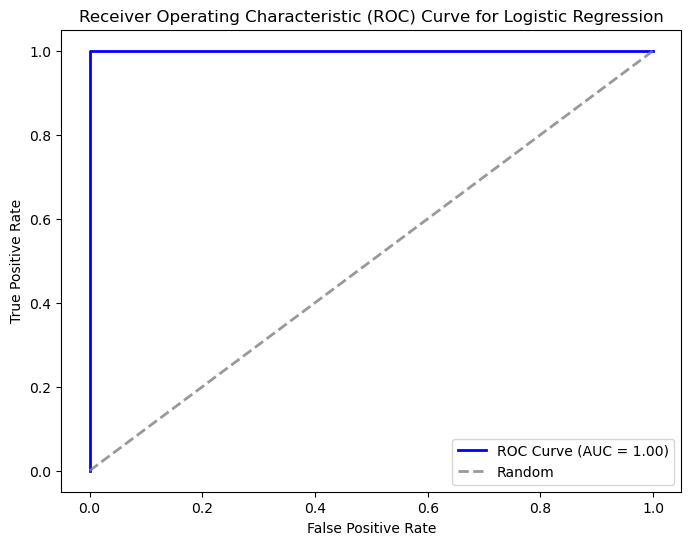

In [36]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()